In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import array

In [2]:
df = pd.read_csv('yield_df.csv')

In [3]:

df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485,121.0,16.37


In [4]:

df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:

df.shape

(28242, 7)

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  int64  
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.5+ MB


In [7]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [8]:

df.duplicated().sum()

2310

In [9]:
df.duplicated().sum()

2310

In summary, this code identifies the indices of rows in the df where the values in the column 'average_rain_fall_mm_per_year' are not numeric strings. These rows can be considered for removal or further processing, depending on the specific use case.

In [10]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [11]:

df = df.drop(to_drop)

In [12]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485,121.00,16.37
1,Albania,Potatoes,1990,66667,1485,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.00,16.37
3,Albania,Sorghum,1990,12500,1485,121.00,16.37
4,Albania,Soybeans,1990,7000,1485,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657,2550.07,19.76


In [13]:
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)


Graph Frequency vs Area

In [14]:
len(df['Area'].unique())

101

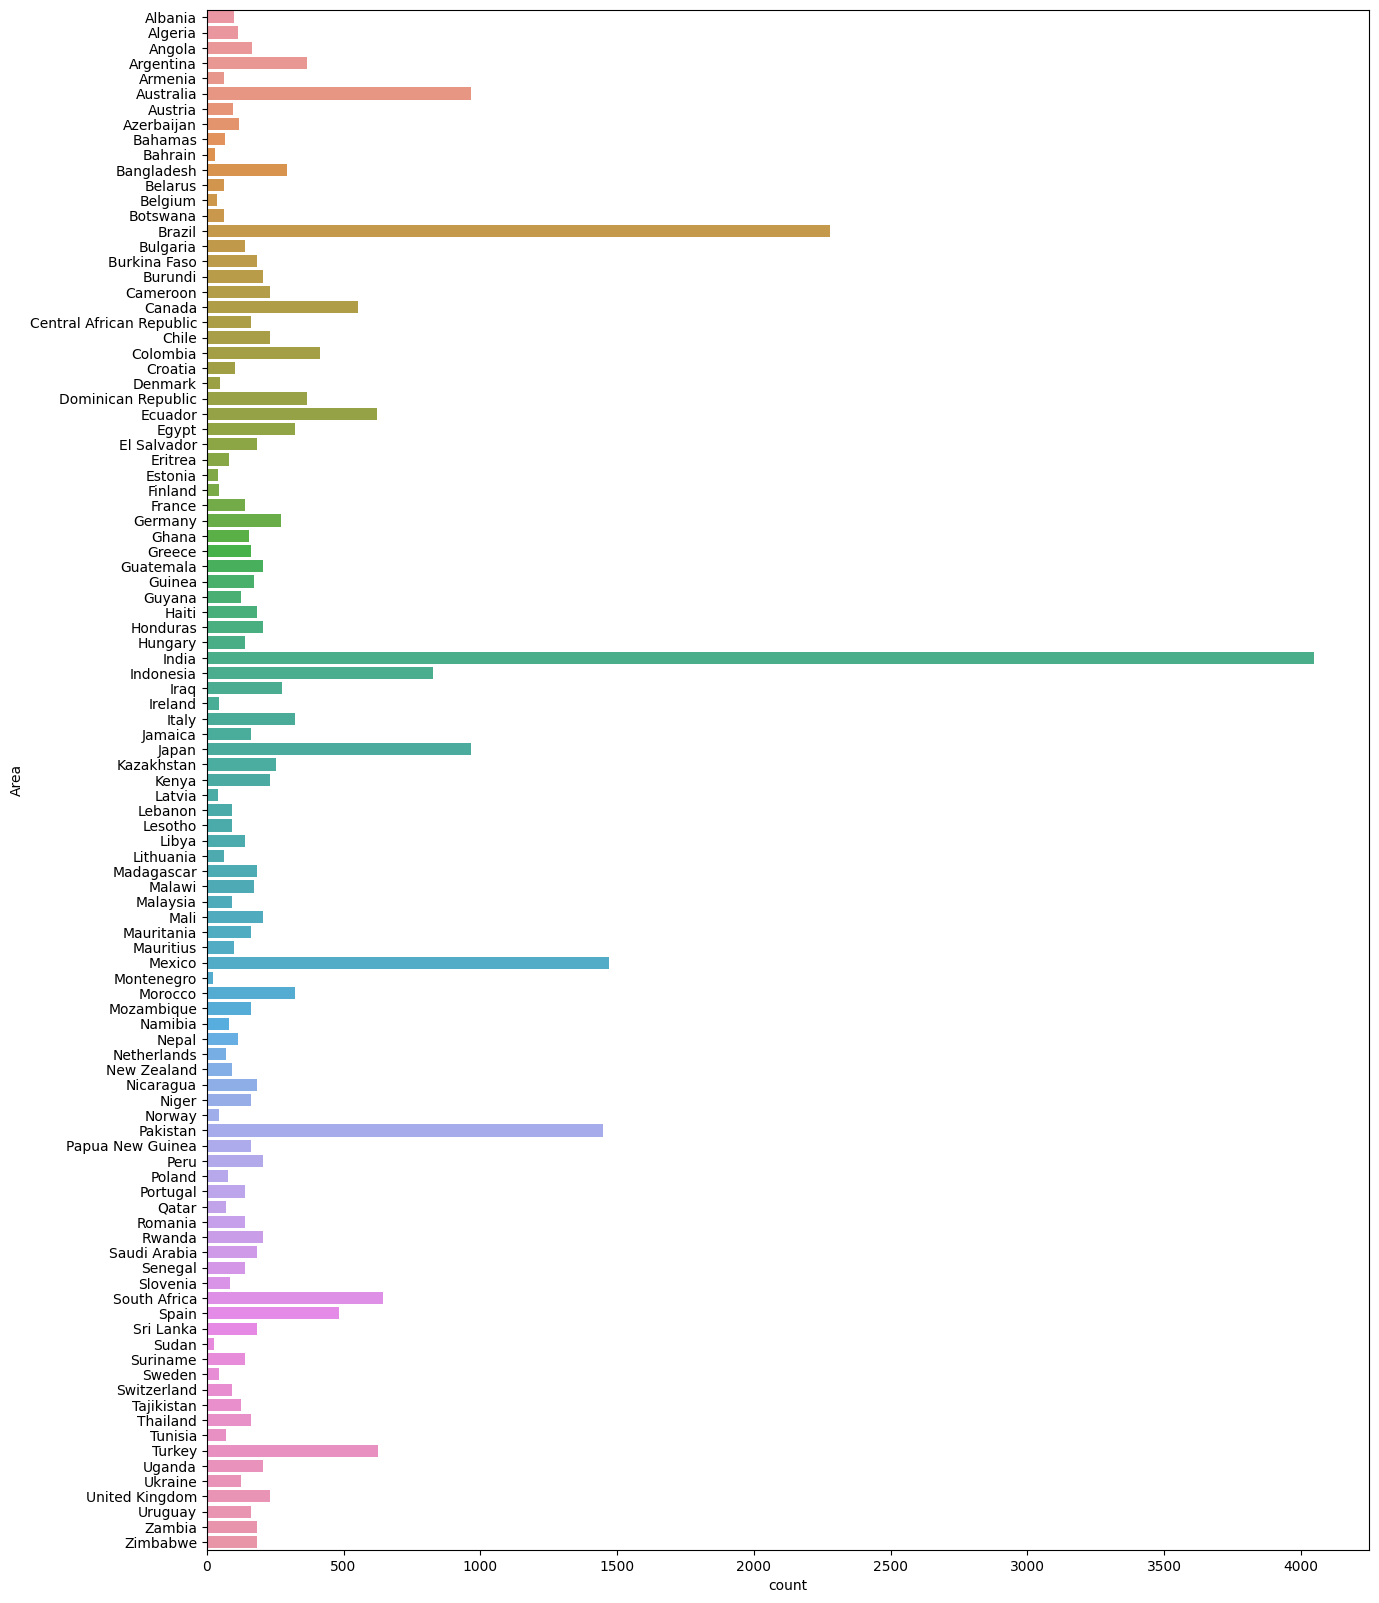

In [15]:

plt.figure(figsize=(15,20))
sns.countplot(y=df['Area'])
plt.show()

In [16]:
(df['Area'].value_counts() < 500).sum()

90


yield_per_country

In [17]:

country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())

In [18]:
df['hg/ha_yield'].sum()

2176140205

In [19]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 15440318,
 4704812,
 8442270,
 470651,
 167550306,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 327420324,
 69193506,
 10984722,
 9104030,
 32280700,
 19698007,
 124470912,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 130788528,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 73897434,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 41333132,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,



Yield Per Country Graph

<Axes: >

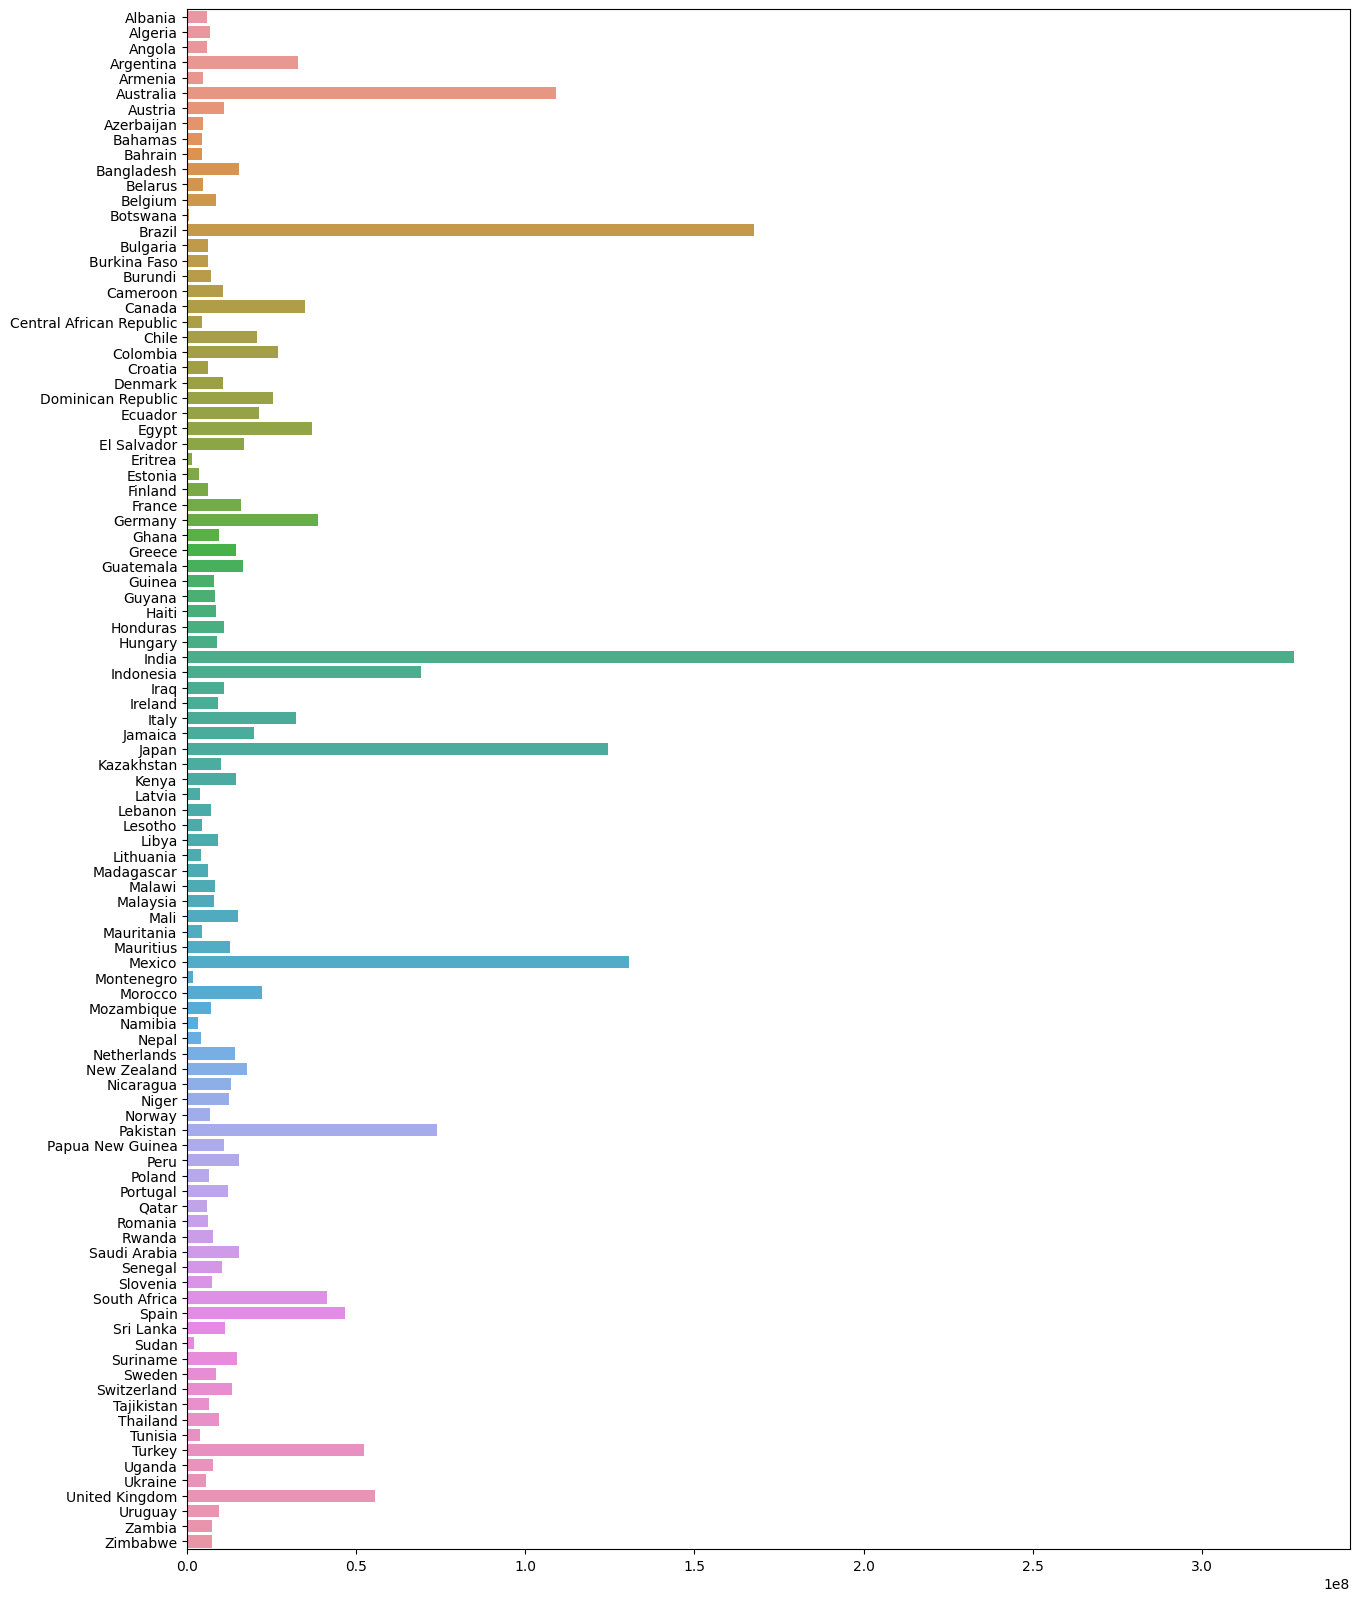

In [20]:

plt.figure(figsize=(15, 20))
sns.barplot(y=country, x=yield_per_country)


Graph Frequency vs Item

<Axes: xlabel='count', ylabel='Item'>

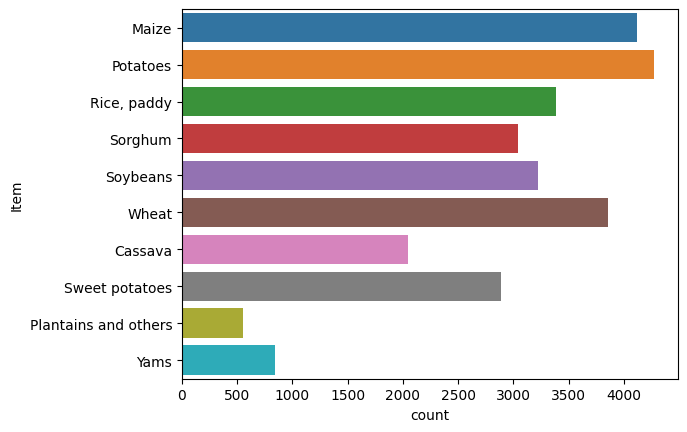

In [21]:
sns.countplot(y=df['Item'])


Yield Vs Item

In [22]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

<Axes: >

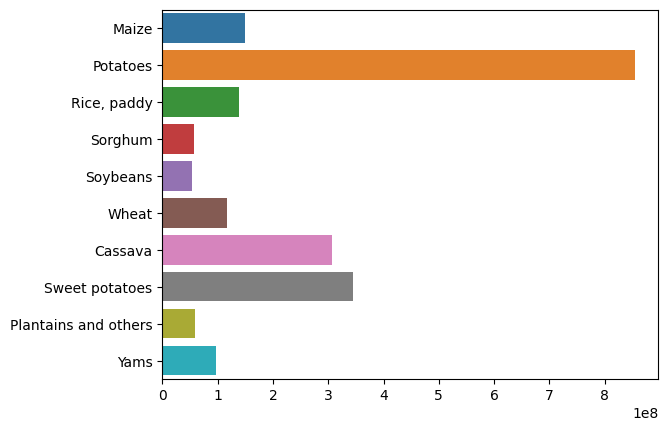

In [23]:
sns.barplot(y=crops,x=yield_per_crop)


Train Test split Rearranging Columns

In [24]:

col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [25]:
df.head(3)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

Converting Categorical to Numerical and Scaling the values

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2, 3]),
            ('OHE', ohe, [4, 5]),
        ],
        remainder='passthrough'
)

In [28]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [29]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [32]:
array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OHE__Area_Algeria', 'OHE__Area_Angola', 'OHE__Area_Argentina',
       'OHE__Area_Armenia', 'OHE__Area_Australia', 'OHE__Area_Austria',
       'OHE__Area_Azerbaijan', 'OHE__Area_Bahamas', 'OHE__Area_Bahrain',
       'OHE__Area_Bangladesh', 'OHE__Area_Belarus', 'OHE__Area_Belgium',
       'OHE__Area_Botswana', 'OHE__Area_Brazil', 'OHE__Area_Bulgaria',
       'OHE__Area_Burkina Faso', 'OHE__Area_Burundi',
       'OHE__Area_Cameroon', 'OHE__Area_Canada',
       'OHE__Area_Central African Republic', 'OHE__Area_Chile',
       'OHE__Area_Colombia', 'OHE__Area_Croatia', 'OHE__Area_Denmark',
       'OHE__Area_Dominican Republic', 'OHE__Area_Ecuador',
       'OHE__Area_Egypt', 'OHE__Area_El Salvador', 'OHE__Area_Eritrea',
       'OHE__Area_Estonia', 'OHE__Area_Finland', 'OHE__Area_France',
       'OHE__Area_Germany', 'OHE__Area_Ghana', 'OHE__Area_Greece',
       'OHE__Area_Guatemala', 'OHE__Area_Guinea', 'OHE__Area_Guyana',
       'OHE__Area_Haiti', 'OHE__Area_Honduras', 'OHE__Area_Hungary',
       'OHE__Area_India', 'OHE__Area_Indonesia', 'OHE__Area_Iraq',
       'OHE__Area_Ireland', 'OHE__Area_Italy', 'OHE__Area_Jamaica',
       'OHE__Area_Japan', 'OHE__Area_Kazakhstan', 'OHE__Area_Kenya',
       'OHE__Area_Latvia', 'OHE__Area_Lebanon', 'OHE__Area_Lesotho',
       'OHE__Area_Libya', 'OHE__Area_Lithuania', 'OHE__Area_Madagascar',
       'OHE__Area_Malawi', 'OHE__Area_Malaysia', 'OHE__Area_Mali',
       'OHE__Area_Mauritania', 'OHE__Area_Mauritius', 'OHE__Area_Mexico',
       'OHE__Area_Montenegro', 'OHE__Area_Morocco',
       'OHE__Area_Mozambique', 'OHE__Area_Namibia', 'OHE__Area_Nepal',
       'OHE__Area_Netherlands', 'OHE__Area_New Zealand',
       'OHE__Area_Nicaragua', 'OHE__Area_Niger', 'OHE__Area_Norway',
       'OHE__Area_Pakistan', 'OHE__Area_Papua New Guinea',
       'OHE__Area_Peru', 'OHE__Area_Poland', 'OHE__Area_Portugal',
       'OHE__Area_Qatar', 'OHE__Area_Romania', 'OHE__Area_Rwanda',
       'OHE__Area_Saudi Arabia', 'OHE__Area_Senegal',
       'OHE__Area_Slovenia', 'OHE__Area_South Africa', 'OHE__Area_Spain',
       'OHE__Area_Sri Lanka', 'OHE__Area_Sudan', 'OHE__Area_Suriname',
       'OHE__Area_Sweden', 'OHE__Area_Switzerland',
       'OHE__Area_Tajikistan', 'OHE__Area_Thailand', 'OHE__Area_Tunisia',
       'OHE__Area_Turkey', 'OHE__Area_Uganda', 'OHE__Area_Ukraine',
       'OHE__Area_United Kingdom', 'OHE__Area_Uruguay',
       'OHE__Area_Zambia', 'OHE__Area_Zimbabwe', 'OHE__Item_Maize',
       'OHE__Item_Plantains and others', 'OHE__Item_Potatoes',
       'OHE__Item_Rice, paddy', 'OHE__Item_Sorghum', 'OHE__Item_Soybeans',
       'OHE__Item_Sweet potatoes', 'OHE__Item_Wheat', 'OHE__Item_Yams'],
      dtype=object)

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OHE__Area_Algeria', 'OHE__Area_Angola', 'OHE__Area_Argentina',
       'OHE__Area_Armenia', 'OHE__Area_Australia', 'OHE__Area_Austria',
       'OHE__Area_Azerbaijan', 'OHE__Area_Bahamas', 'OHE__Area_Bahrain',
       'OHE__Area_Bangladesh', 'OHE__Area_Belarus', 'OHE__Area_Belgium',
       'OHE__Area_Botswana', 'OHE__Area_Brazil', 'OHE__Area_Bulgaria',
       'OHE__Area_Burkina Faso', 'OHE__Area_Burundi',
       'OHE__Area_Cameroon', 'OHE__Area_Canada',
       'OHE__Area_Central African Republic', 'OHE__Area_Chile',
       'OHE__Area_Colombia', 'OHE__Area_Croatia', 'OHE__Area_Denmark',
       'OHE__Area_Dominican Republic', 'OHE__Area_Ecuador',
       'OHE__Area_Egypt', 'OHE__Area_El Salvador', 'OHE__Area_Eritrea',
       'OHE__Area_Estonia', 'OHE__Area_Finland', 'OHE__Area_France',
       'OHE__Area_Germany', 'OHE__Area_Ghana',

Training the Model

In [33]:
#linear regression
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score


models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'Rid':Ridge(),
    'Dtr':DecisionTreeRegressor()
}
for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)
    
    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}")

lr : mae : 29260.996186950426 score : 0.7597275888324064


c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 265453683310.70312, tolerance: 16161857296.835388
  model = cd_fast.sparse_enet_coordinate_descent(


lss : mae : 29237.92582273365 score : 0.7597239082463669
Rid : mae : 29208.092505112836 score : 0.7596371622560613
Dtr : mae : 3661.1240927597805 score : 0.9807720210954326


Selecting Model

In [34]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([ 33157.,  87717.,  33045., ..., 166379.,  94475.,  72700.])

In [35]:
array([35286., 22814., 19295., ..., 16135., 34879., 77391.])

array([35286.0, 22814.0, 19295.0, Ellipsis, 16135.0, 34879.0, 77391.0],
      dtype=object)


Predictive System

In [36]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
   
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)

    transformed_features = preprocesser.transform(features)

   
    predicted_yield = dtr.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

Year = 1990
average_rain_fall_mm_per_year =1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37                   
Area = 'Albania'
Item = 'Maize'
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [37]:
result

array([36613.])